In [63]:
import pandas as ps
import matplotlib.pyplot as mt
import numpy as pn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [20]:
fd=ps.read_excel(r"C:\Users\Harshit\Downloads\customer_churn_large_dataset.xlsx")
fd.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [21]:
fd.drop(['CustomerID'], axis=1,inplace=True)

In [22]:
fd.shape

(100000, 8)

In [23]:
fd.isnull().sum()/len(fd)*100

Name                          0.0
Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

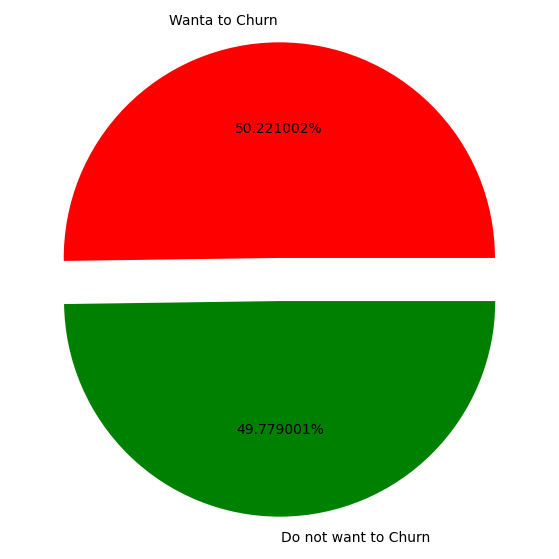

In [24]:
mt.figure(figsize= (12,7))
labels=["Wanta to Churn","Do not want to Churn"]
explode = [0.1, 0.1]
colors=['red','green']
sizes=fd.Churn.value_counts().values
mt.pie(sizes,explode,labels,autopct='%0f%%',colors=colors)
mt.show()

In [25]:
fd["Churn"].value_counts()

Churn
0    50221
1    49779
Name: count, dtype: int64

In [26]:
fd.columns

Index(['Name', 'Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [27]:
from scipy import stats

# Select only numerical columns from your dataset
numerical_columns = fd.select_dtypes(include=['number'])

# Define the threshold for Z-score or IQR-based outlier detection
z_score_threshold = 3  # You can adjust this threshold as needed
iqr_multiplier = 1.5  # You can adjust this multiplier as needed

outliers = []

# Iterate through each numerical column
for column in numerical_columns.columns:
    # Calculate Z-scores for the current column
    z_scores = stats.zscore(fd[column])
    
    # Calculate the IQR for the current column
    q1 = fd[column].quantile(0.25)
    q3 = fd[column].quantile(0.75)
    iqr = q3 - q1
    
    # Identify outliers using Z-score or IQR method
    z_score_outliers = fd[abs(z_scores) > z_score_threshold]
    iqr_outliers = fd[(fd[column] < (q1 - iqr_multiplier * iqr)) | (fd[column] > (q3 + iqr_multiplier * iqr))]
    
    # Combine outliers detected using both methods
    column_outliers = ps.concat([z_score_outliers, iqr_outliers]).drop_duplicates()
    
    # Append column outliers to the list of all outliers
    outliers.append(column_outliers)

# Combine outliers detected in all columns
all_outliers = ps.concat(outliers).drop_duplicates()

print("Outliers detected in all columns:")
print(all_outliers)
# As we can see that there are no outliers detected

Outliers detected in all columns:
Empty DataFrame
Columns: [Name, Age, Gender, Location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB, Churn]
Index: []


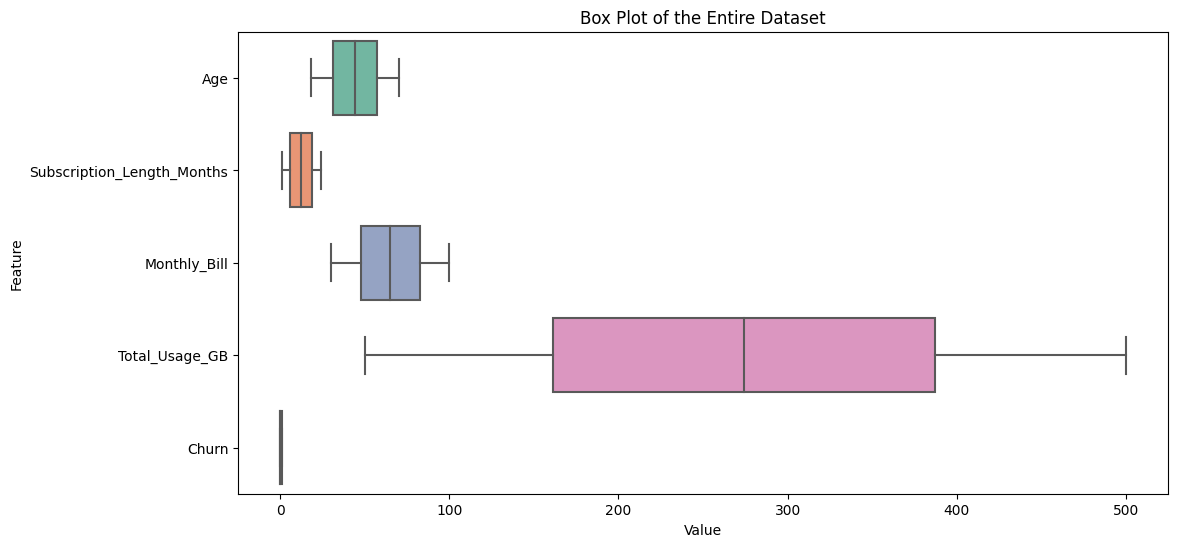

In [28]:
import seaborn as sns
# Assuming 'dataset' is your DataFrame containing the data
mt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Create a box plot for the entire dataset
sns.boxplot(data=fd, orient="h", palette="Set2")  # "h" for horizontal orientation

mt.title("Box Plot of the Entire Dataset")
mt.xlabel("Value")
mt.ylabel("Feature")

# Show the plot
mt.show()

# We have vizualize and also see

In [33]:
from sklearn.preprocessing import LabelEncoder

cat_cols=["Gender","Age","Location","Subscription_Length_Months","Monthly_Bill","Total_Usage_GB",
         "Churn"]
le=LabelEncoder()
for x in cat_cols:
    fd[x]=le.fit_transform(fd[x])

In [31]:
fd.drop(["Name"],axis=1,inplace=True)

In [34]:
fd

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,45,1,2,16,4336,186,0
1,44,0,4,0,1876,122,0
2,6,0,2,4,5547,410,0
3,18,0,3,2,6794,247,1
4,28,0,3,18,2814,216,0
...,...,...,...,...,...,...,...
99995,15,1,1,22,2513,176,1
99996,44,0,4,18,3165,301,0
99997,46,1,0,16,6611,201,1
99998,33,0,4,19,1925,384,1


<Axes: xlabel='Churn', ylabel='Count'>

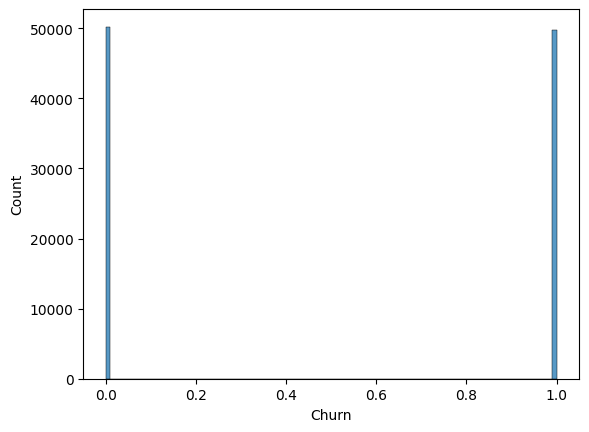

In [35]:
sns.histplot(data=fd,x="Churn",bins=101)

In [36]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Age                         100000 non-null  int64
 1   Gender                      100000 non-null  int64
 2   Location                    100000 non-null  int64
 3   Subscription_Length_Months  100000 non-null  int64
 4   Monthly_Bill                100000 non-null  int64
 5   Total_Usage_GB              100000 non-null  int64
 6   Churn                       100000 non-null  int64
dtypes: int64(7)
memory usage: 5.3 MB


C:\Users\Harshit\AppData\Local\Temp\ipykernel_32312\1835522887.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fd[column])
C:\Users\Harshit\AppData\Local\Temp\ipykernel_32312\1835522887.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fd[column])
C:\Users\Harshit\AppData\Local\Temp\ipyker

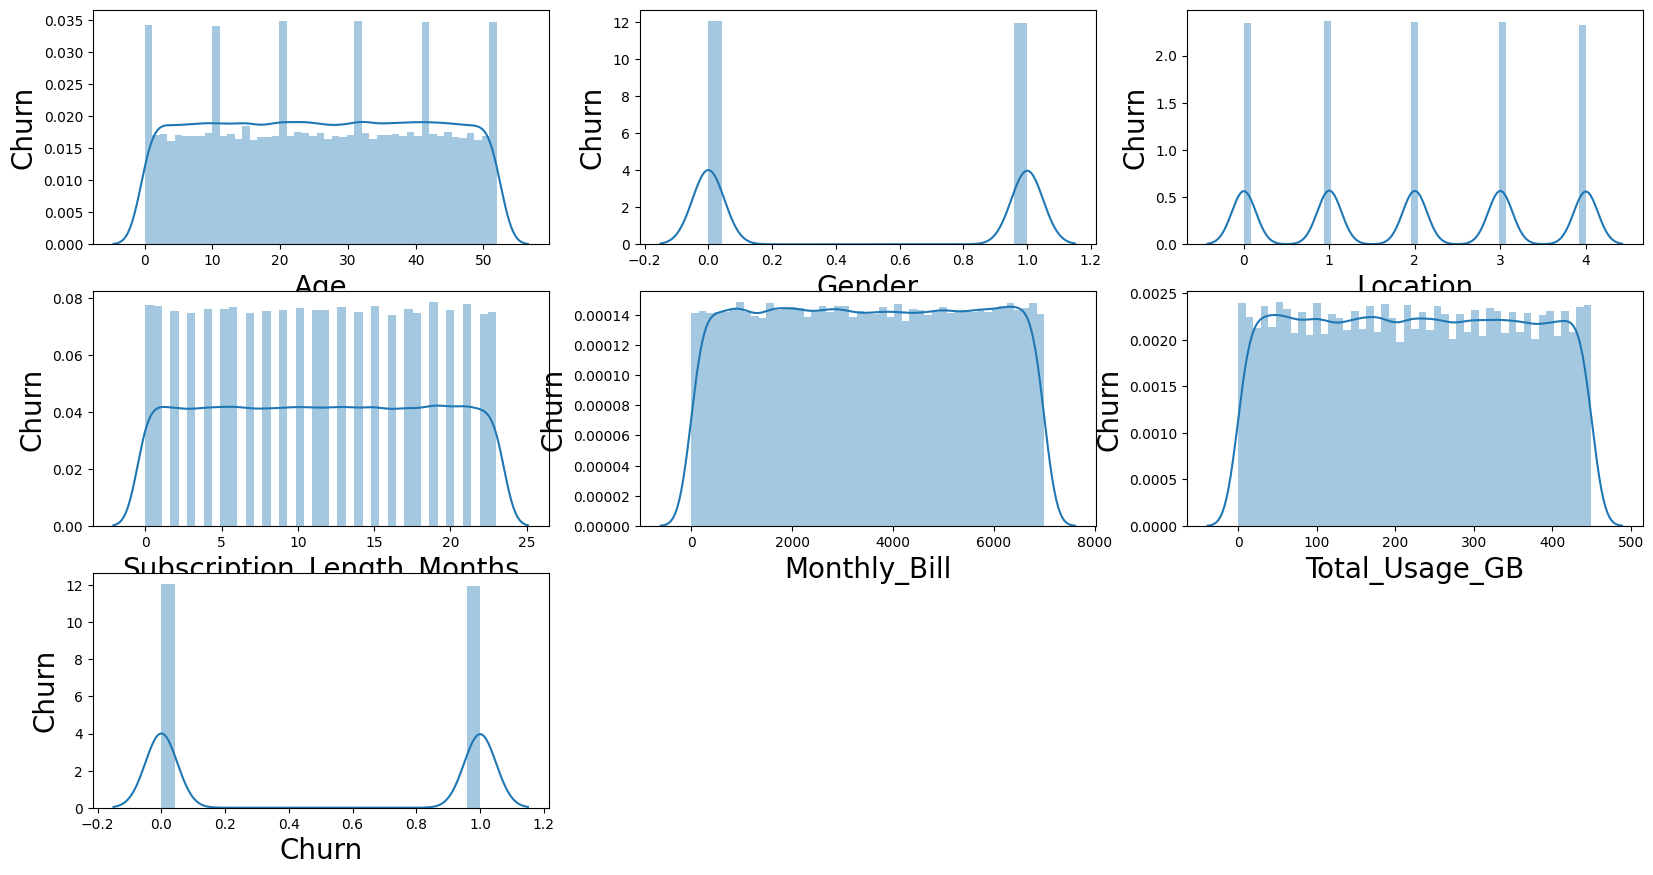

In [37]:
mt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in fd:
    if plotnumber<=21:     # as there are 9 columns in the data
        ax = mt.subplot(7,3,plotnumber)
        sns.distplot(fd[column])
        mt.xlabel(column,fontsize=20)
        mt.ylabel('Churn',fontsize=20)
        plotnumber+=1
    else:
        continue
mt.show()

In [38]:
# coefficient of variance
cv = lambda x: pn.std(x, ddof=1) / pn.mean(x) * 100 
cv(fd)

Age                             2.837021
Gender                          0.092832
Location                        0.262092
Subscription_Length_Months      1.286005
Monthly_Bill                  375.614152
Total_Usage_GB                 24.222485
Churn                           0.092832
dtype: float64

In [39]:
fd.value_counts("Location")

Location
1    20157
2    20041
3    20031
0    19958
4    19813
Name: count, dtype: int64

In [42]:
fd.value_counts("Churn")

Churn
0    50221
1    49779
Name: count, dtype: int64

<Axes: >

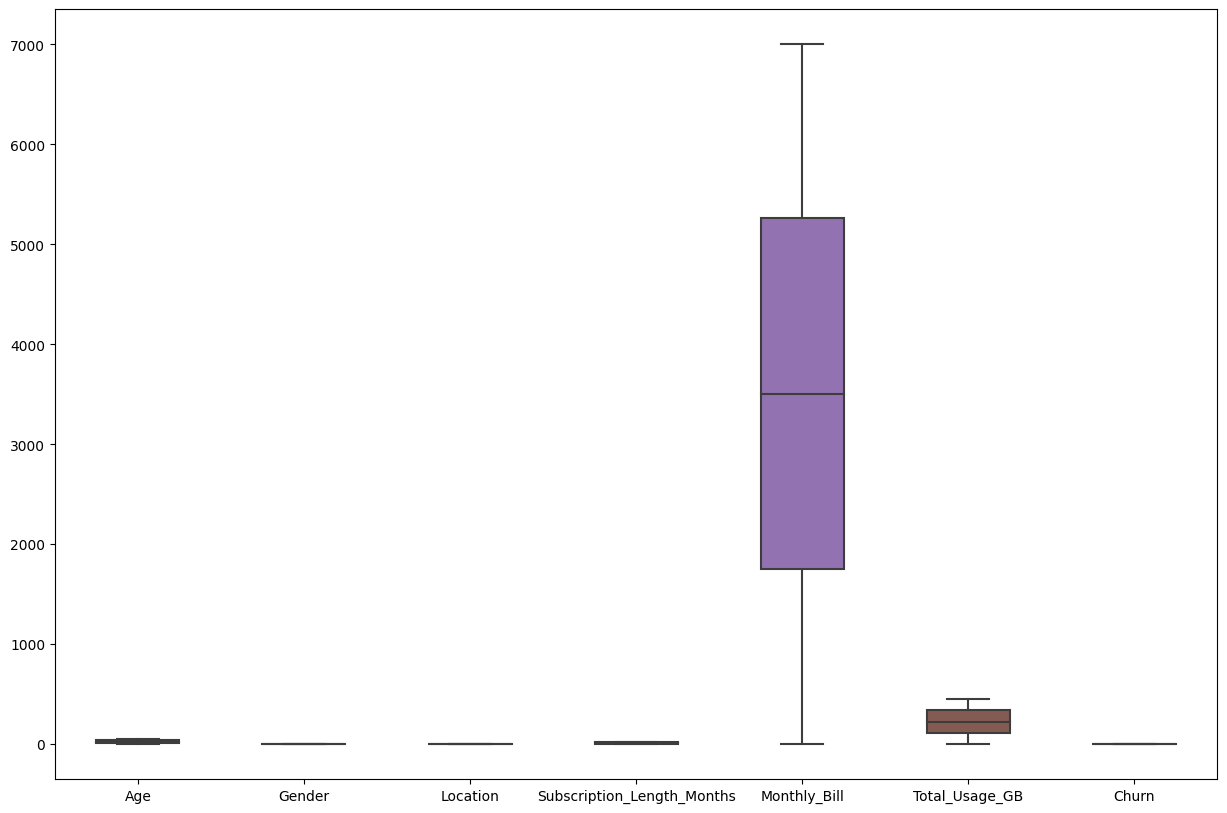

In [43]:
fig, ax = mt.subplots(figsize=(15,10))
sns.boxplot(data=fd, width= 0.5,ax=ax,  fliersize=3)

In [45]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
pn.random.seed(0)
df_train, df_test = train_test_split(fd, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
num_vars=["Age","Gender","Location","Subscription_Length_Months","Monthly_Bill","Total_Usage_GB","Churn"]
fd[num_vars]=scaler.fit_transform(fd[num_vars])

In [46]:
for x in fd:
    print(x)

Age
Gender
Location
Subscription_Length_Months
Monthly_Bill
Total_Usage_GB
Churn


In [53]:
fd.describe()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500520,0.497840,0.49896,0.499570,0.500760,0.498653,0.497790
std,0.293852,0.499998,0.35291,0.301150,0.289010,0.289918,0.499998
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.25000,0.217391,0.250571,0.246667,0.000000
50%,0.500000,0.000000,0.50000,0.478261,0.500143,0.497778,0.000000
75%,0.750000,1.000000,0.75000,0.782609,0.752000,0.748889,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [64]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [65]:
X_scaled

array([[ 1.24167039,  1.00432937,  0.00294695,  0.65111499,  0.41060598,
        -0.29428898],
       [ 1.17622625, -0.99568929,  1.41974758, -1.65887854, -0.80537409,
        -0.78485174],
       [-1.31065114, -0.99568929,  0.00294695, -1.08138015,  1.0092043 ,
         1.42268068],
       ...,
       [ 1.30711454,  1.00432937, -1.41385369,  0.65111499,  1.5351404 ,
        -0.17931334],
       [ 0.45634069, -0.99568929,  1.41974758,  1.08423877, -0.78115335,
         1.22338955],
       [-1.11431871, -0.99568929,  0.00294695,  0.93986418,  0.56927655,
        -0.7771867 ]])

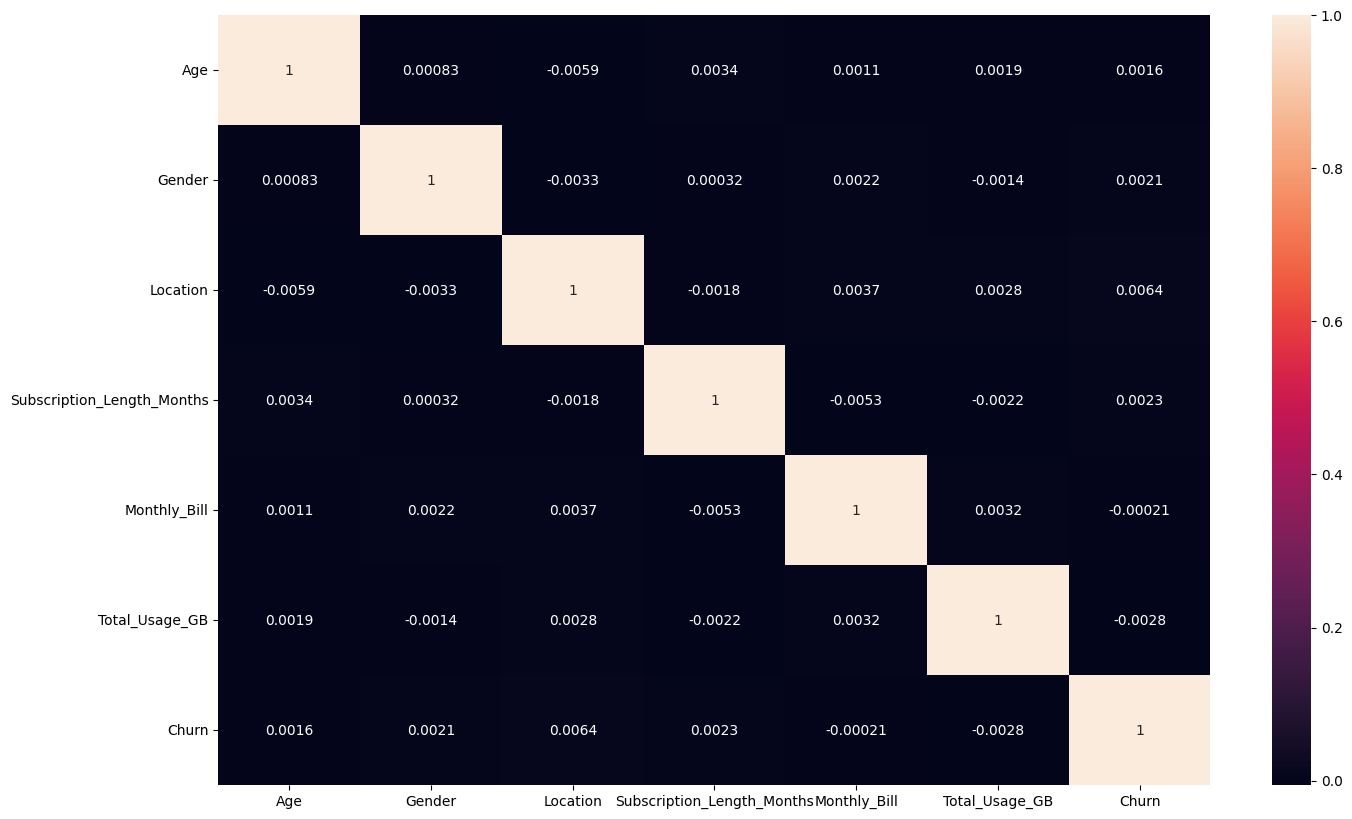

In [55]:
# Let's check the correlation coefficients to see which variables are highly correlated

mt.figure(figsize = (16, 10))
sns.heatmap(fd.corr(), annot = True)
mt.show()

In [57]:
X = fd.drop(columns = ['Churn'])
y = fd['Churn']

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = ps.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

In [67]:
vif

,vif,Features
0,1.000052,Age
1,1.000019,Gender
2,1.000071,Location
3,1.000047,Subscription_Length_Months
4,1.000058,Monthly_Bill
5,1.000029,Total_Usage_GB


In [68]:
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [69]:
X_scaled

array([[ 1.24167039,  1.00432937,  0.00294695,  0.65111499,  0.41060598,
        -0.29428898],
       [ 1.17622625, -0.99568929,  1.41974758, -1.65887854, -0.80537409,
        -0.78485174],
       [-1.31065114, -0.99568929,  0.00294695, -1.08138015,  1.0092043 ,
         1.42268068],
       ...,
       [ 1.30711454,  1.00432937, -1.41385369,  0.65111499,  1.5351404 ,
        -0.17931334],
       [ 0.45634069, -0.99568929,  1.41974758,  1.08423877, -0.78115335,
         1.22338955],
       [-1.11431871, -0.99568929,  0.00294695,  0.93986418,  0.56927655,
        -0.7771867 ]])

In [70]:
X=fd.drop('Churn',axis=1)
y=fd['Churn']

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [72]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [73]:
logmodel=LogisticRegression()

In [74]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [75]:
prediction=logmodel.predict(x_test)

In [76]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n         0.0       0.50      0.69      0.58     12555\n         1.0       0.50      0.31      0.38     12445\n\n    accuracy                           0.50     25000\n   macro avg       0.50      0.50      0.48     25000\nweighted avg       0.50      0.50      0.48     25000\n'

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix=confusion_matrix(y_test,prediction)
confusion_matrix

array([[8703, 3852],
       [8635, 3810]], dtype=int64)

In [79]:
true_positive =confusion_matrix[0][0]
false_positive =confusion_matrix[0][1]
false_negative =confusion_matrix[1][0]
true_negative =confusion_matrix[1][1]
print('True-Negative=',true_negative)
print('True-Positive=',true_positive)
print('False-Negative=',false_negative)
print('False-Positive=',false_positive)

True-Negative= 3810
True-Positive= 8703
False-Negative= 8635
False-Positive= 3852


In [80]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.50052

In [86]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.6931899641577061

In [87]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.5019610104971738

In [88]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.5822767872077074

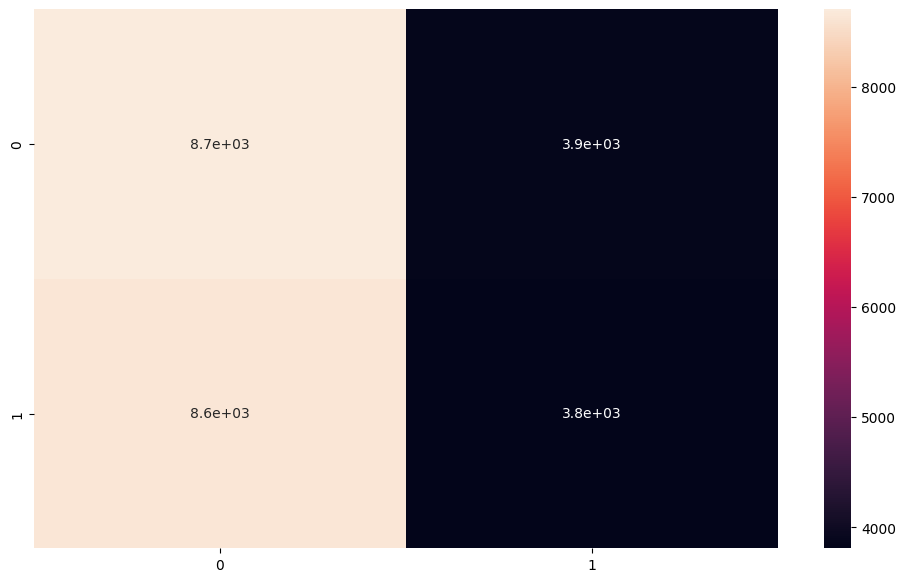

In [89]:
mt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix,annot=True)
mt.show()

In [90]:
auc = roc_auc_score(y_test, y_pred)
auc

0.49966850558226816

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

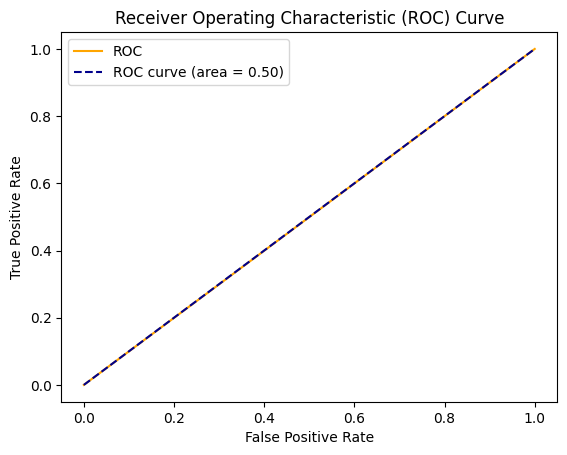

In [92]:
mt.plot(fpr, tpr, color='orange', label='ROC')
mt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
mt.xlabel('False Positive Rate')
mt.ylabel('True Positive Rate')
mt.title('Receiver Operating Characteristic (ROC) Curve')
mt.legend()
mt.show()

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.49915
              precision    recall  f1-score   support

         0.0       0.50      0.53      0.51     10079
         1.0       0.49      0.47      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [95]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network model
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Make predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype(int).flatten()

# Evaluate the Neural Network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)
print(classification_report(y_test, y_pred_nn))

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6945 - accuracy: 0.5003
Epoch 2/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6936 - accuracy: 0.5045
Epoch 3/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6932 - accuracy: 0.5065
Epoch 4/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6931 - accuracy: 0.5061
Epoch 5/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6931 - accuracy: 0.5096
Epoch 6/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6929 - accuracy: 0.5099
Epoch 7/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6929 - accuracy: 0.5096
Epoch 8/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6928 - accuracy: 0.5132
Epoch 9/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6927 - accuracy: 0.5135
Epoch 10/10
625/625 [==============================] - 1s 875us/step
Neural Networ

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.5023
              precision    recall  f1-score   support

         0.0       0.51      0.56      0.53     10079
         1.0       0.50      0.44      0.47      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [98]:
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for your model (e.g., Random Forest)
cross_val_scores = cross_val_score(svm_classifier, X_scaled, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.50125 0.5014  0.5019  0.50195 0.4962 ]
Mean Accuracy: 0.50054
